# Predicting Loan Default Using Machine Learning Models

**Here's a summary of the steps in this project.**

**1. Data Preprocessing:**

o   Begins by importing necessary libraries for data manipulation, machine learning models, and evaluation metrics (e.g., pandas, sklearn).

o	The data is loaded from a CSV file into a pandas DataFrame. The dimensions of the data are inspected to ensure it loads correctly, with 5000 rows and 14 columns.

o	I then drops irrelevant features like 'ID' and 'ZIP Code' to prevent overfitting and reduce dimensionality, ensuring the model focuses on more informative features.

**2. Data Exploration:**
   
o	Basic data exploration is performed, inspecting the first few rows and checking the shape of the dataset.

o	The goal of this step is to understand the type and distribution of data before moving to model building.

**3. Model Building:**
   
o	A variety of machine learning models are utilized, including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, and Voting Classifiers.

o	The dataset is split into training and test sets for model evaluation, and preprocessing like scaling is applied where necessary.

o	Models are then trained using the training data, and their performance is evaluated on the test data using metrics such as accuracy, confusion matrix, and classification report.

**4. Evaluation and Improvement:**
   
o	Metrics like classification accuracy, confusion matrices, and F1 scores are computed to assess model performance.

o	The models are compared based on their accuracy to determine which one performs best for the loan prediction task.
This project follows a standard data science workflow, from preprocessing and exploration to building and evaluating machine learning models. 


In [10]:
# pandas for data preprocessing and numpy for numerical computations
import pandas as pd
import numpy as np

# plottting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Scalling and split API from sklearn to split the data set into train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import sklearn.ensemble
dir(sklearn.ensemble)

# Load libraries and use Tree model
from sklearn.tree import DecisionTreeClassifier

#load ensemble model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

#  metrics module for accuracy,report and confusion matrix
from sklearn import metrics                
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
# load in the bank data into dataframe
bank_df= pd.read_csv("bank.csv")

# first 5 rows
display(bank_df.head())

bank_df.shape

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


(5000, 14)

**Doing initial data exploration, also known as data inspection, to ensure the data loads correctly and see what kind of data I will be working with**

**Observation: The dimensions/records are (5000, 14) rows and columns.**

In [14]:
# Drop ID and Zip Code
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)


**The code line above is for dropping 'ID', 'ZIP Code' which are non-informative or irrelevant features before training machine learning models. This will help to prevent overfitting, reduce noise and dime which are nsionality thereby making the model more faster and potentially more accurate** 

In [16]:
# Rename features for easy handling

# view features
bank_df.columns

# Rename features
bank_df.columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard']

**This code line above assigns new, cleaner names to all columns in the DataFrame. This helps to standardized the column names to make it easier to type in code**

In [18]:
# View data types
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


**This code line above displays a summary of the DataFrame, including: Number of entries (rows), Number of columns ,Column names and Data types**

In [20]:
# statistics of the data -numerical columns 
bank_df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Code:** This codel line produced descriptive statistics for numerical columns in the bank_df DataFrame which helps to understand the distribution and range of each numerical feature

**Observation:** There are some negative values in that data set and that has to be converted

In [22]:
# Replace negative values in the data set with zero
bank_df = bank_df.applymap(lambda x: max(x, 0))

**This code line is for cleaning the data to remove invalid values like negative age, negative income and negative experience**

Check outliuers for Age


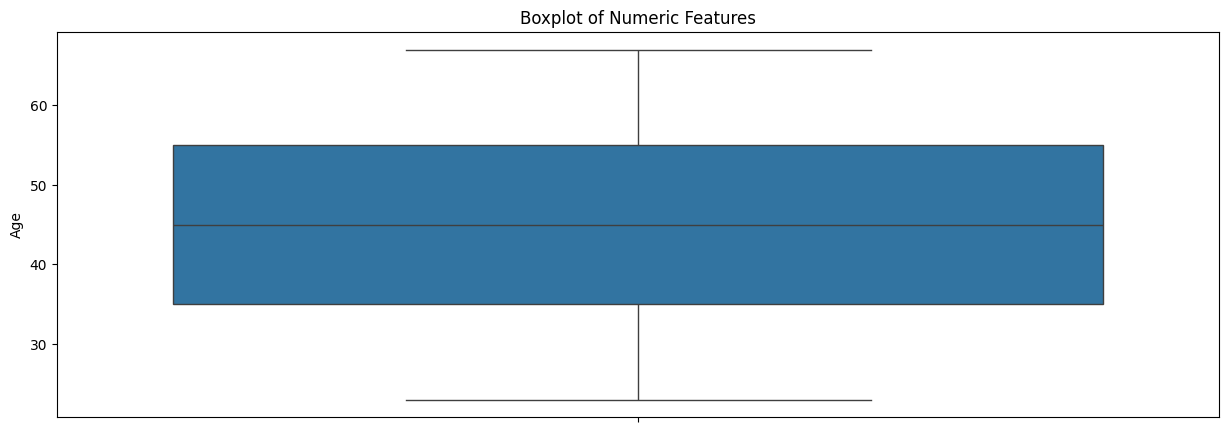

Check outliuers for Experience


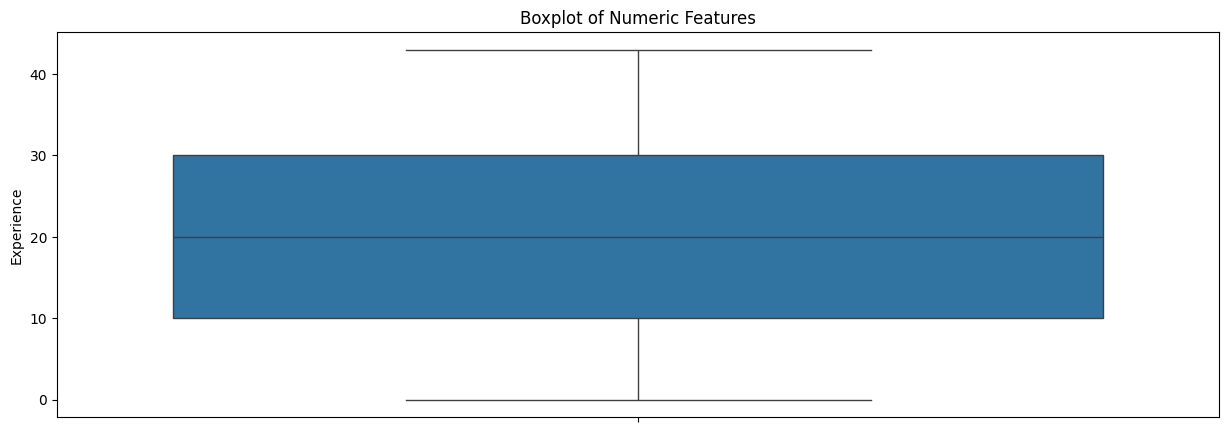

Check outliuers for Income


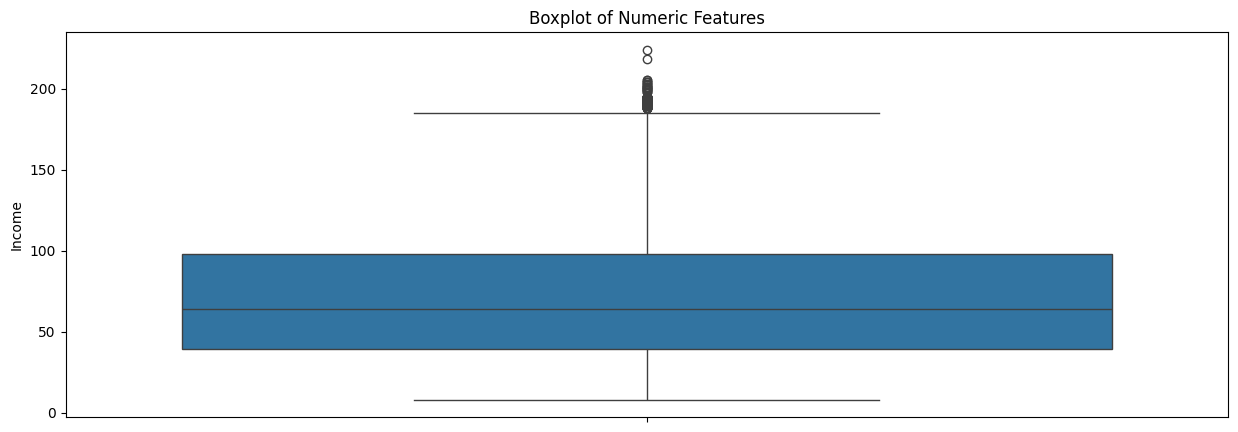

Check outliuers for Family


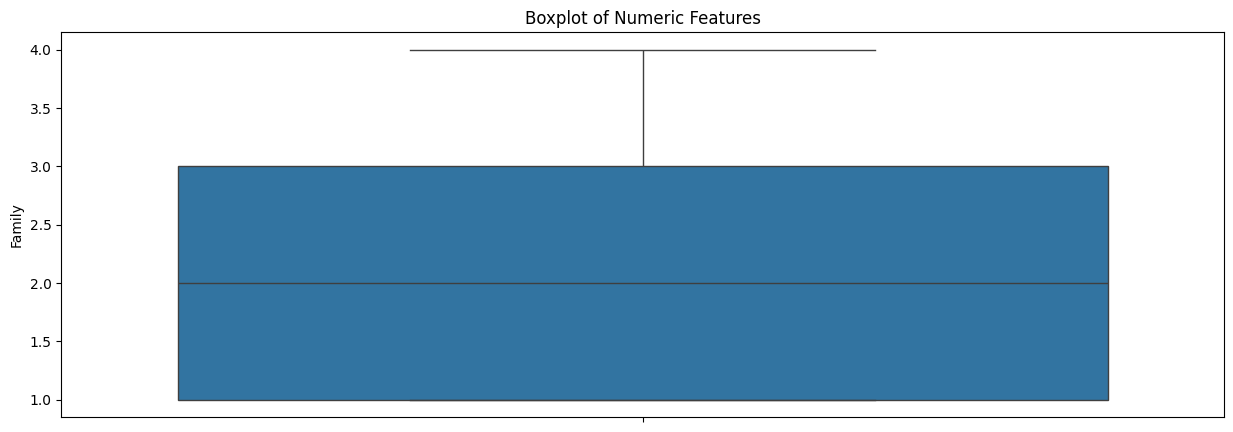

Check outliuers for CCAvg


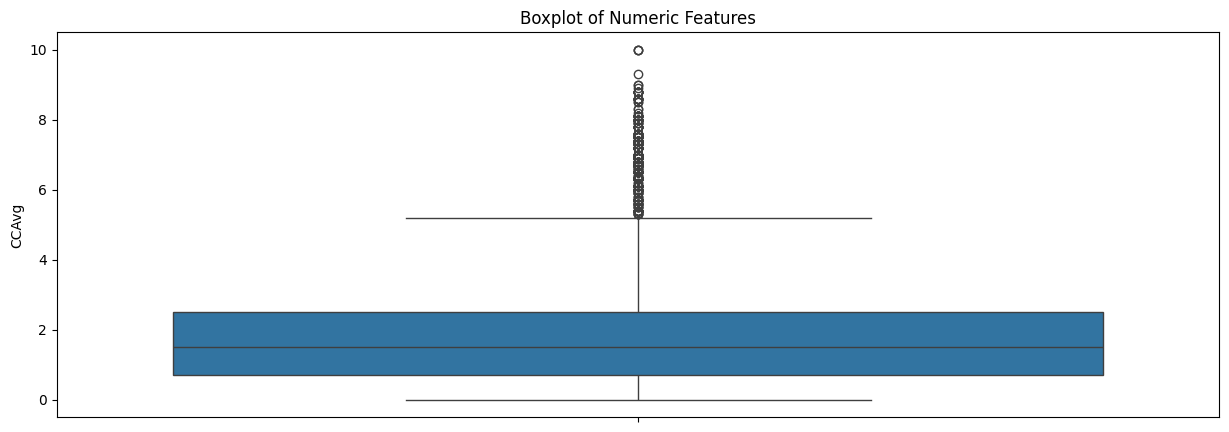

Check outliuers for Education


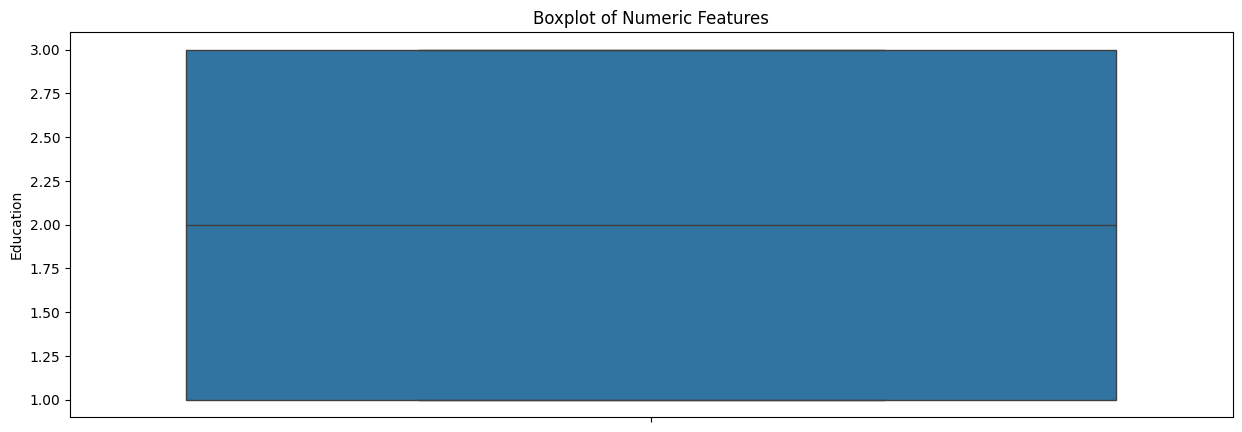

Check outliuers for Mortgage


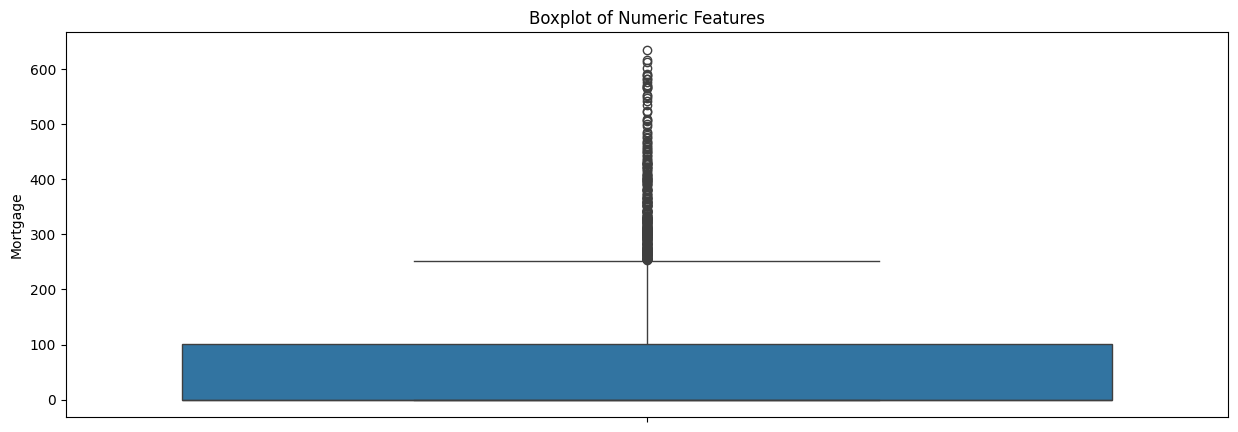

Check outliuers for Personal_Loan


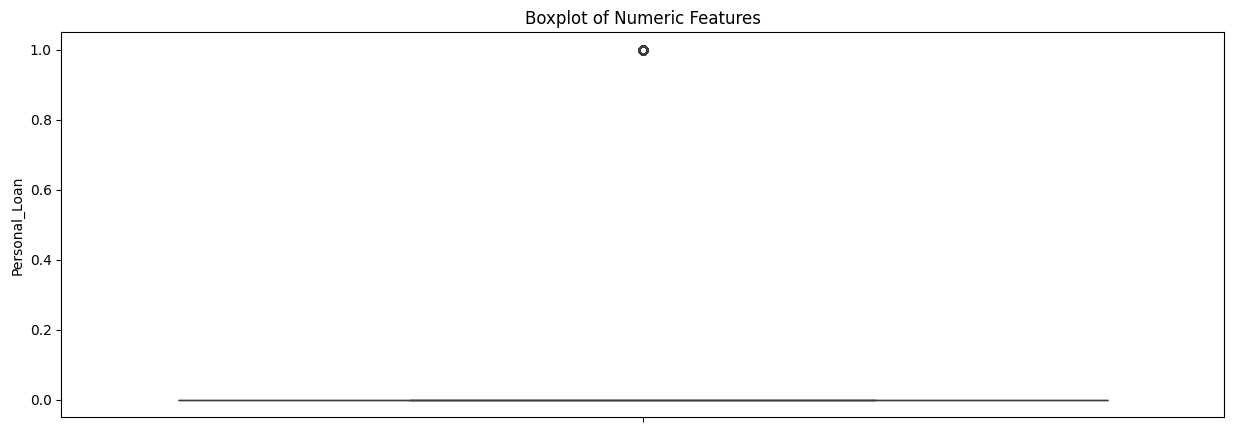

Check outliuers for Securities_Account


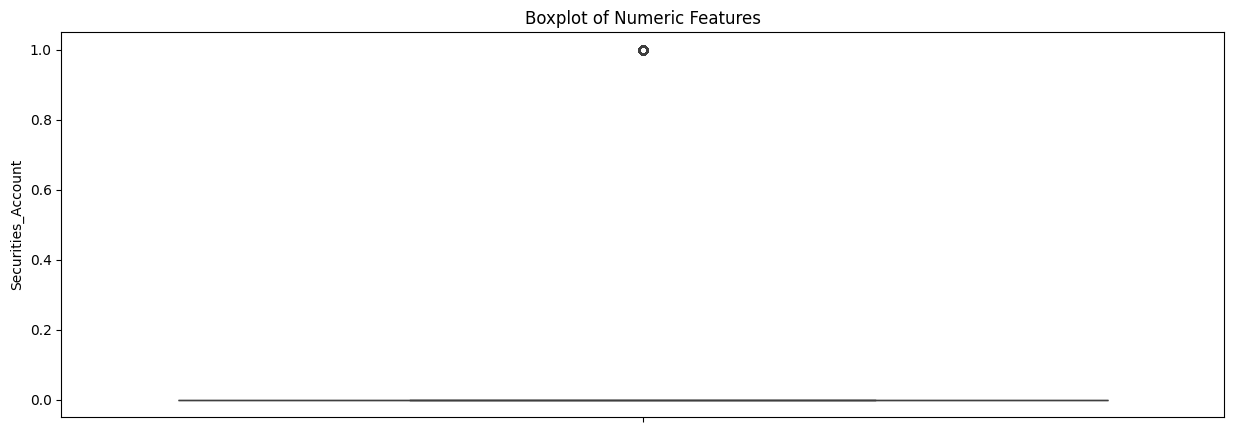

Check outliuers for CD_Account


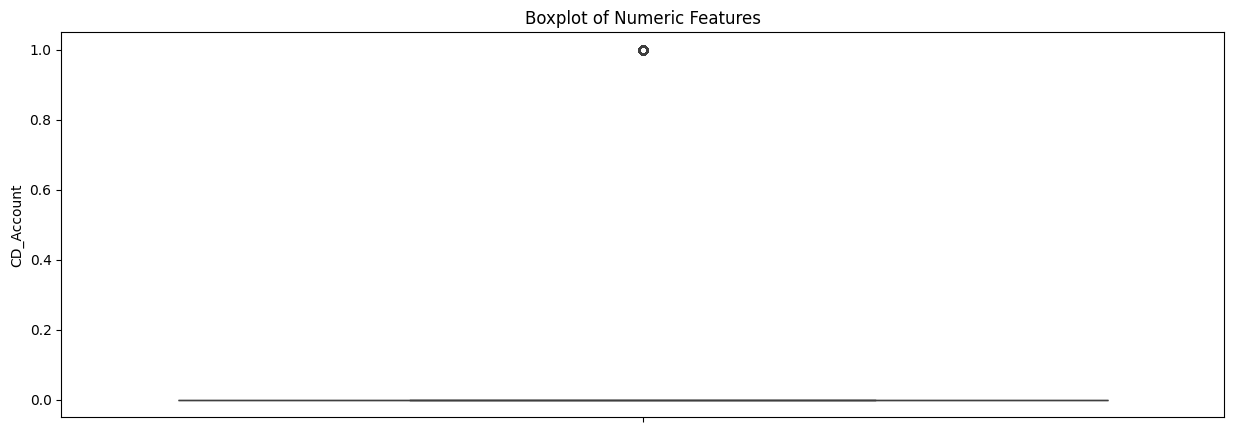

Check outliuers for Online


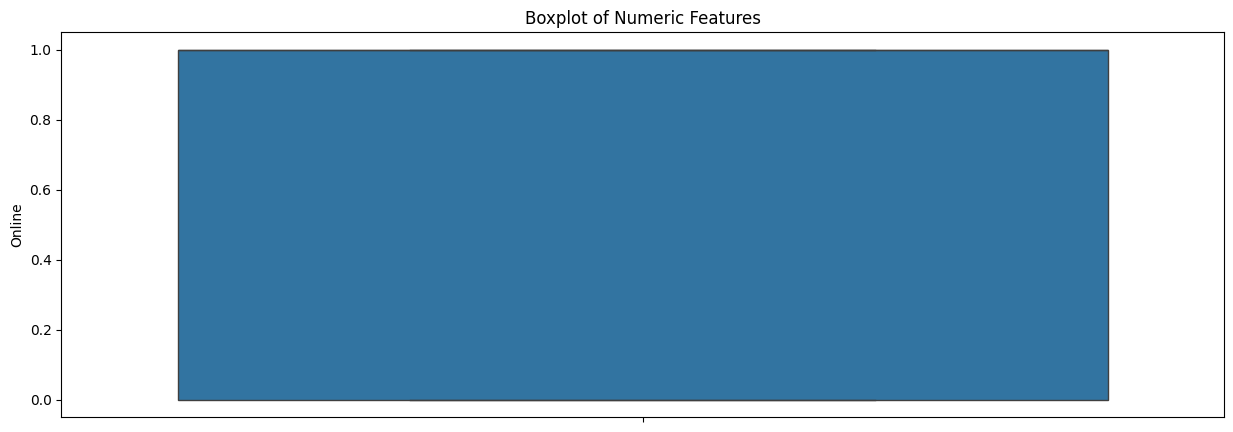

Check outliuers for CreditCard


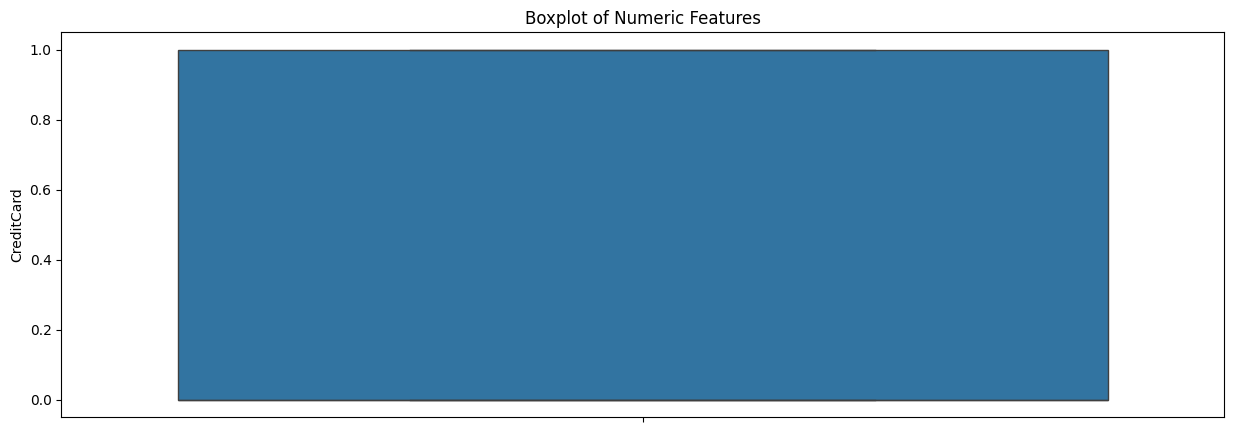

In [24]:
# checking for outliers 
for col in  bank_df.select_dtypes(include='number').columns:
    print(f"Check outliuers for {col}")
    plt.figure(figsize=[15, 5])
    sns.boxplot(data =bank_df[col])
    plt.title("Boxplot of Numeric Features")
    plt.xticks(rotation=45)
    plt.show()

**Code:** This code lines is for visually checking for outliers using boxplot in each numeric column

**Observation:** The data contains outliers but after dropping the outliers the target columns has only non-acceptors of the loan. Based on that I didn't remove the outliers

In [26]:
# checking whether we have duplicates
bank_df.duplicated().sum()

13

***Observation: From the above output we have 13 duplicates in our dataset.***

In [28]:
# Drop Duplicates
bank_df.drop_duplicates(inplace= True)
bank_df.shape

(4987, 12)

**This code lines is for cleaning up the dataset by removing any duplicate rows**

In [30]:
# missing values
bank_df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Code:** This code line is for checking  if there are missing values

**Observation:** Based on the output(results) there are no missing values in the data set.

In [32]:
#Determining correlation between depending variable and independant variables

# label col
y = bank_df.Personal_Loan

# independant variable
X = bank_df.drop(columns = ["Personal_Loan"] ).select_dtypes(include='number')

# corelation y ~ X 
corr_X = X.corrwith(y)
corr_X.sort_values(ascending=False)

Income                0.502513
CCAvg                 0.366671
CD_Account            0.316210
Mortgage              0.141700
Education             0.137618
Family                0.061398
Securities_Account    0.021670
Online                0.006718
CreditCard            0.002399
Age                  -0.008003
Experience           -0.008155
dtype: float64

**This line of code is for examining how strongly each numerical feature correlates with the target variable (Personal_Loan) and the results shows that age, experience, creditCard and Online are the list correlated to the target variable "Personal loan"**

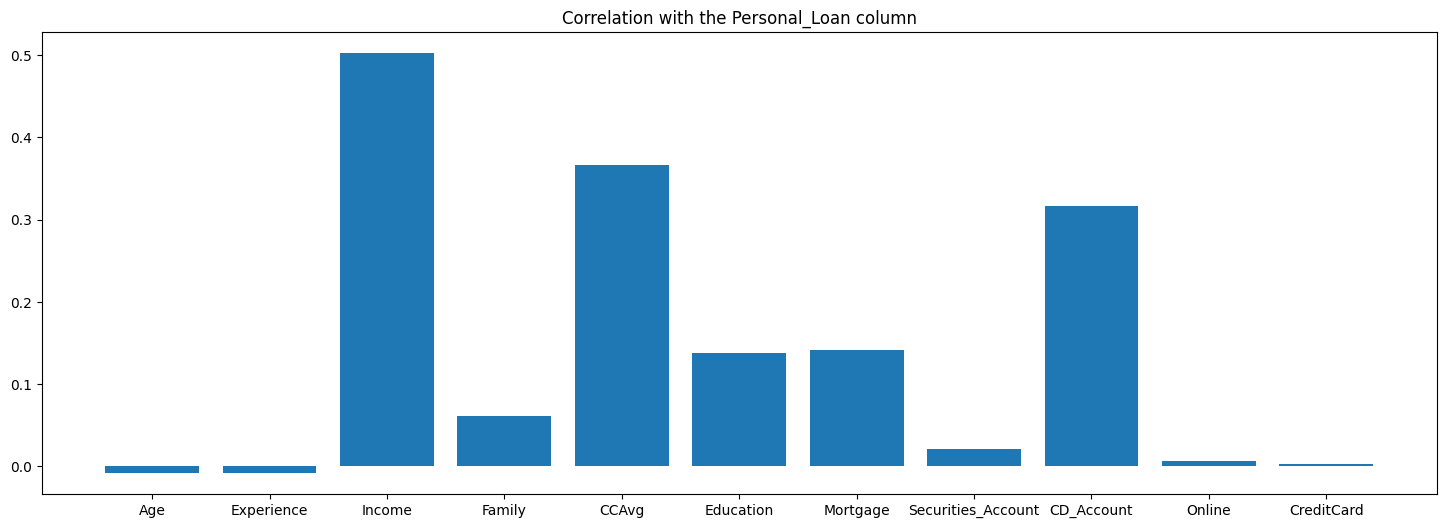

In [34]:
# bar chart: features importance
plt.figure(figsize=(18, 6) )

plt.bar(corr_X.index, corr_X.values)

plt.title("Correlation with the Personal_Loan column")

plt.show()

**This line of codes is for visualizing feature importance (based on correlation) using a bar chart the results shows that age, experience, creditCard and Online are the list important to the determination of the  target variable "Personal loan".**

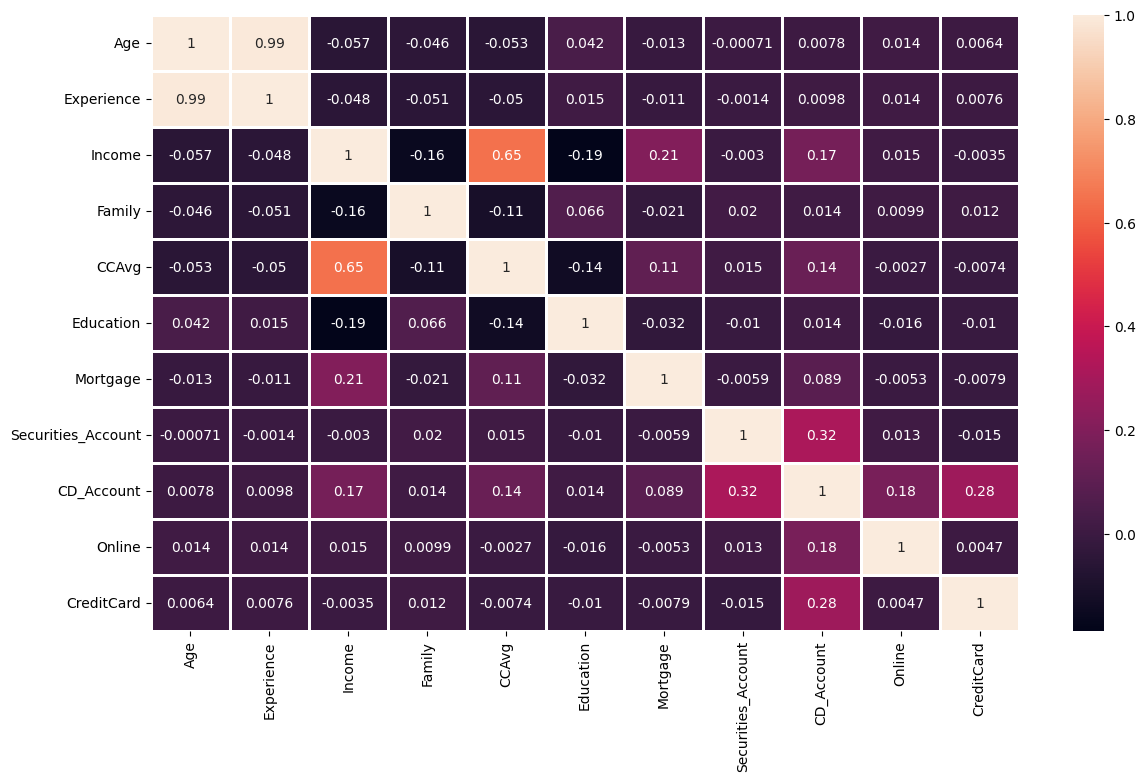

In [36]:
#correlation matrix X ~ X

plt.figure(figsize=(14, 8))

# correlation heatmap
sns.heatmap(X.corr(), annot=True, linewidth =1)

plt.show() 

**Code:** This code is for exploring how the independent variables relate to each other using a correlation matrix heatmap and this is key for detecting multicollinearity.

**Results interpretation**

Age and experience are highly correlated to each other- multicollinearity effect of 0.99 and when we check with target variable they are also the least correlated it means both of them contribute same information to the model which means that we don't need both we need only one of them.


# Feature Engineering and Feature selection


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=bank_df.drop(columns='Personal_Loan')
y=bank_df.Personal_Loan

# Split dataset into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state=42) 
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Built-in feature importance (Gini Importance)
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns,'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
2,Income,0.350594
5,Education,0.204412
4,CCAvg,0.162482
3,Family,0.112373
8,CD_Account,0.044816
0,Age,0.037623
1,Experience,0.037544
6,Mortgage,0.030267
10,CreditCard,0.008174
9,Online,0.007446


**Code:** This code is for training a Random Forest Classifier and using it to identify which features are most important and it helps to understand the data feature relevance.

**Observation:** Age and Experience carry almost the same weight and with earlier observation of high multicollinearity between these two features confirms the need to remove one of them from the model.

In [42]:
# Drop experience
bank_df.drop(columns=['Experience'], inplace=True)


**The code above is for dropping Experience because it is less important in determining the target variable, high multicollinearity with Age which is also less inmportant in determining the target variable and finally carry almost the same weight as Age**

# Modelling 
The following are the tasks to work on:

        - splitting data
        - scaling data
        - train/test using:
            - Naïve Bayes
            - logistic regression
            - Random Forest
            - Ensemble
         
         - Comparison and Evaluations    
             - confusion Matrix

In [44]:
# Label the data

X=bank_df.drop(columns='Personal_Loan')
y=bank_df.Personal_Loan


**This code is for labeling your dataset for modeling by separating features (X) from the target variable (y).**

In [46]:
# split into 60% training and 40% validation

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.40,random_state=1)


**This code is for splitting your labeled data into training and validation sets and this is very important before any performance evaluation or model comparison.**

In [48]:
# Scaling training and validation data set

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

**This code is to normalize (or scale) the features in the training and validation dataset so that all values fall within a similar range. This will ensuring the model treats each feature equally**

# Model 1

In [50]:
# run naive Bayes

gnb = GaussianNB()


**Code:** Code is for setting up a Naive Bayes model using the GaussianNB class

**Reason for selecting Gaussian naive Bayes:** It assumes continuous features are normally distributed (Gaussian) and it allows negative values.
The Gaussian naive bayes works reasonably well for numerical/tabular data like this data with features like age, income, mortgage, etc.

In [52]:
# Fitting the model 

gnb.fit(X_train, y_train)


GaussianNB()

**This code is for  fitting the Naive Bayes model to the training data**

In [54]:
# predict class membership
y_train_pred = gnb.predict(X_train)
y_valid_pred = gnb.predict(X_valid)

**This code is for predicting class memberships for both the training and validation data sets**

In [56]:
# Generating confusion matrices

#training
print(f"\nTraining Model Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Training Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")

# validation
print(f"\nValidation Model Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Validation Confusion Matrix:\n{confusion_matrix(y_valid, y_valid_pred)}")


Training Model Accuracy: 0.8814
Training Confusion Matrix:
[[2483  227]
 [ 128  154]]

Validation Model Accuracy: 0.8872
Validation Confusion Matrix:
[[1647  150]
 [  75  123]]


**Code:** This code is for displaying the confusion matrices and accuracy for both the training and validation datasets, which is great for evaluating the performance of the model.

**Observation:** Guassian naive bayes model produce training accuracy of 88.24% and validation accuracy of 88.72%. The model performs slightly better on the validation data than the training data

# Model 2

In [59]:
# Train logistic regression
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

**This code is for  fitting the Logistics Regression model to the training data**

In [61]:
# predict class membership
y_train_pred = logreg.predict(X_train)
y_valid_pred = logreg.predict(X_valid)

**This code is for predicting class memberships for both the training and validation data sets**

In [63]:
# Generating confusion matrices

#training
print(f"\nTraining Model Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Training Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")

# validation
print(f"\nValidation Model Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Validation Confusion Matrix:\n{confusion_matrix(y_valid, y_valid_pred)}")


Training Model Accuracy: 0.9492
Training Confusion Matrix:
[[2683   27]
 [ 125  157]]

Validation Model Accuracy: 0.9529
Validation Confusion Matrix:
[[1789    8]
 [  86  112]]


**Code:** This code is for displaying the confusion matrices and accuracy for both the training and validation datasets, which is great for evaluating the performance of the model.

**Observation:** The logistics regression model produce training accuracy of 94.95% and validation accuracy of 95.34%. The model performs slightly better on the validation data than the training data

# Model 3

In [66]:
# Train Random forest Model
rfc = RandomForestClassifier(n_estimators=500, random_state=1)

# Fit the model
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=1)

**This code is for  fitting the Random Forest Classifier model to the training data**

In [68]:
# predict class membership
y_train_pred = rfc.predict(X_train)
y_valid_pred = rfc.predict(X_valid)

**This code is for predicting class memberships for both the training and validation data sets**

In [70]:
# Generating confusion matrices

#training
print(f"\nTraining Model Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Training Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")

# validation
print(f"\nValidation Model Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Validation Confusion Matrix:\n{confusion_matrix(y_valid, y_valid_pred)}")


Training Model Accuracy: 1.0000
Training Confusion Matrix:
[[2710    0]
 [   0  282]]

Validation Model Accuracy: 0.9865
Validation Confusion Matrix:
[[1790    7]
 [  20  178]]


**Code:** This code is for displaying the confusion matrices and accuracy for both the training and validation datasets, which is great for evaluating the performance of the model.

**Observation:** The Random forest classification model produce training accuracy of 100% and validation accuracy of 98.65%. The model performs better on the training data than the validation data

# Ensemble
**Will combine the three modelsm in an ensembl**e

In [73]:
# Creating and fitting an ensemble Model
voting_clf = VotingClassifier(estimators=[('NB', gnb), ('lr', logreg), ('rf', rfc)],voting='hard')

# Fit the model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=1))])

**Creating an ensemble model using a technique called hard voting. The idea is to leverage the strengths of each model and reduce the weaknesses of any individual one. This will help to improve accuracy and reduced overfitting/underfitting**

# Let’s look at each classifier’s accuracy on the validation data set.

In [75]:
# Getting each classifier's in the ensemble accuracy.

for clf in (logreg, rfc, gnb,voting_clf):
    clf.fit(X_train, y_train)
    # predict class membership
    y_train_pred = clf.predict(X_train)
    y_valid_pred = clf.predict(X_valid)
    print(f"{clf.__class__.__name__} Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")

LogisticRegression Accuracy: 0.9529
RandomForestClassifier Accuracy: 0.9865
GaussianNB Accuracy: 0.8872
VotingClassifier Accuracy: 0.9654


# Code Explanation
   -Training each classifier on the training set (X_train, y_train)

   -Predicting on the validation set (X_valid)

   -Calculating Accuracy for each classifier's prediction

   -Printing the name of the classifier and its accuracy score   

# Output interpretation

**RandomForestClassifier performed the best individually, with the highest accuracy. VotingClassifier did not outperform Random Forest, but it did better than Logistic Regression and Naive Bayes. VotingClassifier acts as a balance so even if one model (like Naive Bayes) is weaker, the ensemble still benefits from the strengths of the others. This shows that while ensemble methods often boost performance, if one base model (like Random Forest) is already very strong, the ensemble may not exceed it.**

# Creating data frame with actual and predicted outcome for each of the models


In [79]:
# Get predictions from each model
logreg_pred = logreg.predict(X_valid)
rfc_pred = rfc.predict(X_valid)
gnb_pred = gnb.predict(X_valid)
voting_pred = voting_clf.predict(X_valid)


**Get each model’s prediction for the same input data (X_valid),so can compare the predictions across different models**

In [81]:
# Create a DataFrame with all results
results_df = pd.DataFrame({'Actual': y_valid,'LogisticRegression': logreg_pred,'RandomForest': rfc_pred,'GaussianNB': gnb_pred,
                           'VotingClassifier': voting_pred})


**Organize all predictions in a table format so that it can be easy to visualize and compare predictions for each data point.**

In [83]:
# Display the DataFrame and display first 10 rows
display(results_df.head(10))


,Actual,LogisticRegression,RandomForest,GaussianNB,VotingClassifier
2592,0,0,0,0,0
4915,0,0,0,0,0
2922,0,0,0,0,0
4285,0,0,0,1,0
4257,0,0,0,0,0
4037,0,0,0,0,0
2119,0,0,0,0,0
3514,0,0,0,0,0
1660,0,0,0,0,0
4057,0,0,0,0,0


**In the rows shown, most models predicted the correct class (0), especially LogisticRegression, RandomForest, and VotingClassifier**

# Add two columns to this data frame for (a) a majority vote of predicted outcomes and (b) the average of the predicted probabilities.

In [86]:
# Step 1: Get predicted probabilities from each classifier
logreg_proba = logreg.predict_proba(X_valid)
rfc_proba = rfc.predict_proba(X_valid)
gnb_proba = gnb.predict_proba(X_valid)


**Using each of the trained classifiers to generate predicted class probabilities for the validation dataset.**

In [88]:
# Step 2: Compute average predicted probabilities
avg_proba = (logreg_proba + rfc_proba + gnb_proba) / 3


**The code line above is computing the average predicted probabilities across the three models**

In [90]:
# Step 3: Get class with highest probability for each sample
avg_proba_vote = np.argmax(avg_proba, axis=1)

**This code line above finds the class with the highest average predicted probability for each sample.**

In [92]:
# Step 4: Compute manual majority vote (across predictions)
predictions = np.vstack([logreg_pred, rfc_pred, gnb_pred])
majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

**This codes above applies a function to each column (axis=0) of the predictions array.The function uses np.bincount(x).argmax() to find the most frequent class in that column — i.e., the majority vote. This is a key part of ensemble learning using manual hard voting**

In [94]:
# Step 5: Add new columns to DataFrame
results_df['MajorityVote'] = majority_vote
results_df['AvgProbaVote'] = avg_proba_vote

**This code is for adding the two new columns to actual and predicted data frame generated from the models.**

In [96]:
# Step 6: Confusion matrices and accuracy
conf_matrix_majority = confusion_matrix(y_valid, majority_vote)
conf_matrix_avg_proba = confusion_matrix(y_valid, avg_proba_vote)

accuracy_majority = accuracy_score(y_valid, majority_vote)
accuracy_avg_proba = accuracy_score(y_valid, avg_proba_vote)

**Evaluating how effective the ensemble methods are by comparing their predictions to the actual labels**

In [98]:
# Display results
print("Confusion Matrix (Majority Vote):\n", conf_matrix_majority)
print(f"Accuracy (Majority Vote): {accuracy_majority:.4f}")

print("\nConfusion Matrix (Avg Proba Vote):\n", conf_matrix_avg_proba)
print(f"Accuracy (Avg Proba Vote): {accuracy_avg_proba:.4f}")

Confusion Matrix (Majority Vote):
 [[1791    6]
 [  63  135]]
Accuracy (Majority Vote): 0.9654

Confusion Matrix (Avg Proba Vote):
 [[1789    8]
 [  58  140]]
Accuracy (Avg Proba Vote): 0.9669


**Observation: Both ensemble strategies perform very well, with minimal error. Soft voting (Average Probability) performed slightly better than hard voting.The biggest difference lies in handling class 1, Soft voting was a bit better at detecting class 1. Soft voting is often more accurate than hard voting when models can output probabilities which is confirmed by the output above**

In [100]:
# Preview first 10 rows of updated DataFrame
display(results_df.head(10))

,Actual,LogisticRegression,RandomForest,GaussianNB,VotingClassifier,MajorityVote,AvgProbaVote
2592,0,0,0,0,0,0,0
4915,0,0,0,0,0,0,0
2922,0,0,0,0,0,0,0
4285,0,0,0,1,0,0,0
4257,0,0,0,0,0,0,0
4037,0,0,0,0,0,0,0
2119,0,0,0,0,0,0,0
3514,0,0,0,0,0,0,0
1660,0,0,0,0,0,0,0
4057,0,0,0,0,0,0,0


**In the rows shown, most models predicted the correct class (0), especially LogisticRegression, RandomForest, VotingClassifier, MajorityVote and AvgProbaVote**

# Comparing the error rates for each method: the three individual classifiers and the two ensemble strategies.

In [103]:
# Calculate and display error rates (1 - accuracy)
error_rates = {'Logistic Regression': 1 - accuracy_score(results_df['Actual'], results_df['LogisticRegression']),
    'Random Forest': 1 - accuracy_score(results_df['Actual'], results_df['RandomForest']),
    'GaussianNB': 1 - accuracy_score(results_df['Actual'], results_df['GaussianNB']),
    'Majority Vote Ensemble': 1 - accuracy_majority,
    'Average Probability Ensemble': 1 - accuracy_avg_proba}

error_df = pd.DataFrame.from_dict(error_rates, orient='index', columns=['Error Rate'])
display(error_df)


,Error Rate
Logistic Regression,0.047118
Random Forest,0.013534
GaussianNB,0.112782
Majority Vote Ensemble,0.034586
Average Probability Ensemble,0.033083


**Code:** The code above is for calculating the error rate and put the error rate in a data frame format before displaying it

**Results interpretation**

-Random Forest had the lowest error rate among individual models: just 1.35%.

-Gaussian NB had the highest error rate at 11.28%, indicating it underperformed.

-Soft Voting ensemble (0.0331) outperformed the hard voting one (0.0336), though by a small margin.

-Both ensemble methods performed better than Logistic Regression and GaussianNB, but not better than Random Forest alone.


# Conclusion:

**1.	Model Performance:**

o	The machine learning models, including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, and Voting Classifiers, were successfully implemented to predict loan defaults.

o	Among these models, Random Forest and Voting Classifiers exhibited strong performance, achieving high accuracy rates and providing reliable predictions for loan defaults.

o	The Naive Bayes and Logistic Regression models also performed well, but their precision and recall were slightly lower compared to more complex models like Random Forest.

**2.	Feature Selection and Data Preprocessing:**

o	Dropping irrelevant features (such as 'ID' and 'ZIP Code') helped streamline the data, reducing potential noise and overfitting.

o	Scaling the features ensured that all variables contributed equally to the model, especially for models like Logistic Regression and Naive Bayes that are sensitive to the scale of input data.

**3.	Improvement Potential:**

o	While the models performed well, there is room for further improvement by tuning hyperparameters, exploring additional feature engineering, or incorporating more advanced ensemble methods.

o	Additionally, using more complex models like Gradient Boosting or XGBoost could yield even better predictive performance.

**4.	Practical Implications:**

o	The models developed in this project can be applied in financial institutions to better assess the risk of loan defaults, improving decision-making and reducing potential financial losses.

o	By accurately identifying high-risk borrowers, these models can assist in developing strategies for risk mitigation and targeted interventions.

In [ ]:
# End